# H-1B Visa Petition
## 01-EDA

**Author:** Prasoon Karmacharya

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_csv("../assets/data/893_1632_bundle_archive.zip")

In [3]:
#Settings and Helper Functions
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

def thousand(x, pos):
    return '%1.0f' % (x*1e-3)

num_formatter = FuncFormatter(thousand)

def USD_thousand(x, pos):
    return '$%1.0fM' % (x*1e-6)

USD_formatter = FuncFormatter(USD_thousand)


In [4]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [5]:
df.shape

(3002458, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


### Horizontal Bar chart function

In [7]:
def plot_hbar(df, title_text, xlabel_text, top_n, color_primary= "#133337", width=0.65, x_type="count"):
    ax = df[:top_n].plot(kind="barh", figsize=(20,20), legend=None, color=color_primary, edgecolor=color_primary, width=width)
    ax.set_title(title_text, fontsize=48, color=color_primary)
    ax.set_xlabel(xlabel_text, fontsize=40, color=color_primary);
    ax.tick_params(axis="both", which="major", labelsize=30);
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    if x_type == "count":
        ax.xaxis.set_major_formatter(num_formatter)
    elif x_type == "currency":
        ax.xaxis.set_major_formatter(USD_formatter)
    else:
        pass
    ax.tick_params(direction='out', length=10, width=2, colors=color_primary, axis='x', bottom=True, top=True, labelbottom=True, labeltop=True)
    ax.invert_yaxis()

### Top H-1B Sponsors

In [8]:
top_sponsors = pd.DataFrame(df["EMPLOYER_NAME"].value_counts())
top_sponsors.columns = ["H1B_Count"]

In [9]:
top_sponsors.head(5)

,H1B_Count
INFOSYS LIMITED,130592
TATA CONSULTANCY SERVICES LIMITED,64726
WIPRO LIMITED,48117
DELOITTE CONSULTING LLP,36742
IBM INDIA PRIVATE LIMITED,34219


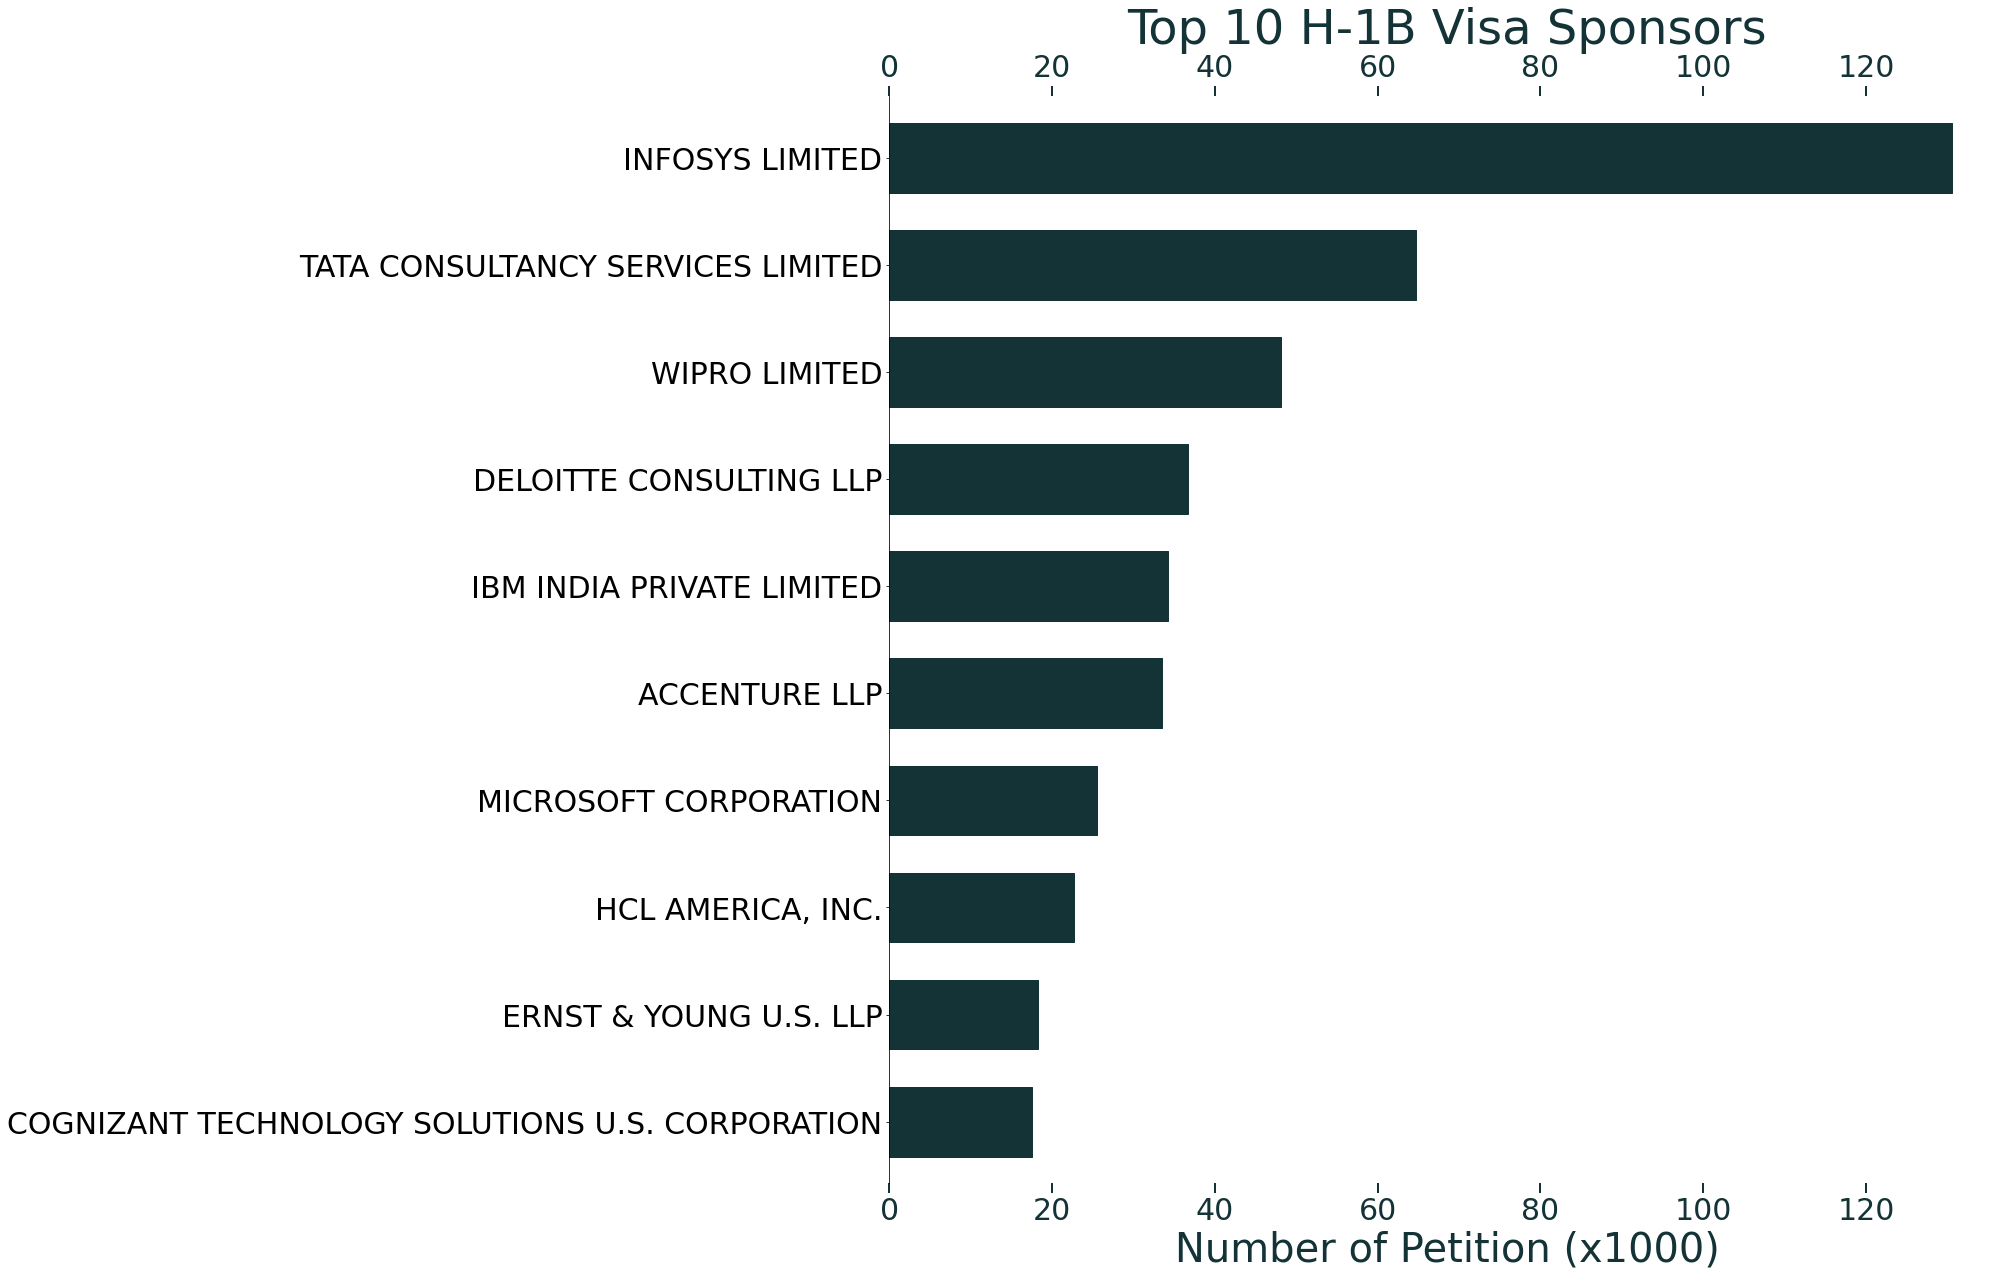

In [10]:
plot_hbar(df=top_sponsors,
          top_n=10,
          title_text = f"Top 10 H-1B Visa Sponsors",
          xlabel_text = "Number of Petition (x1000)",          
          color_primary =  "#133337",
          x_type="count")

### Top H-1B Job Title

In [11]:
top_job_title = pd.DataFrame(df["JOB_TITLE"].value_counts())
top_job_title.columns = ["Job Title"]

In [12]:
top_job_title.head(5)

,Job Title
PROGRAMMER ANALYST,249038
SOFTWARE ENGINEER,121307
COMPUTER PROGRAMMER,70570
SYSTEMS ANALYST,61965
SOFTWARE DEVELOPER,42907


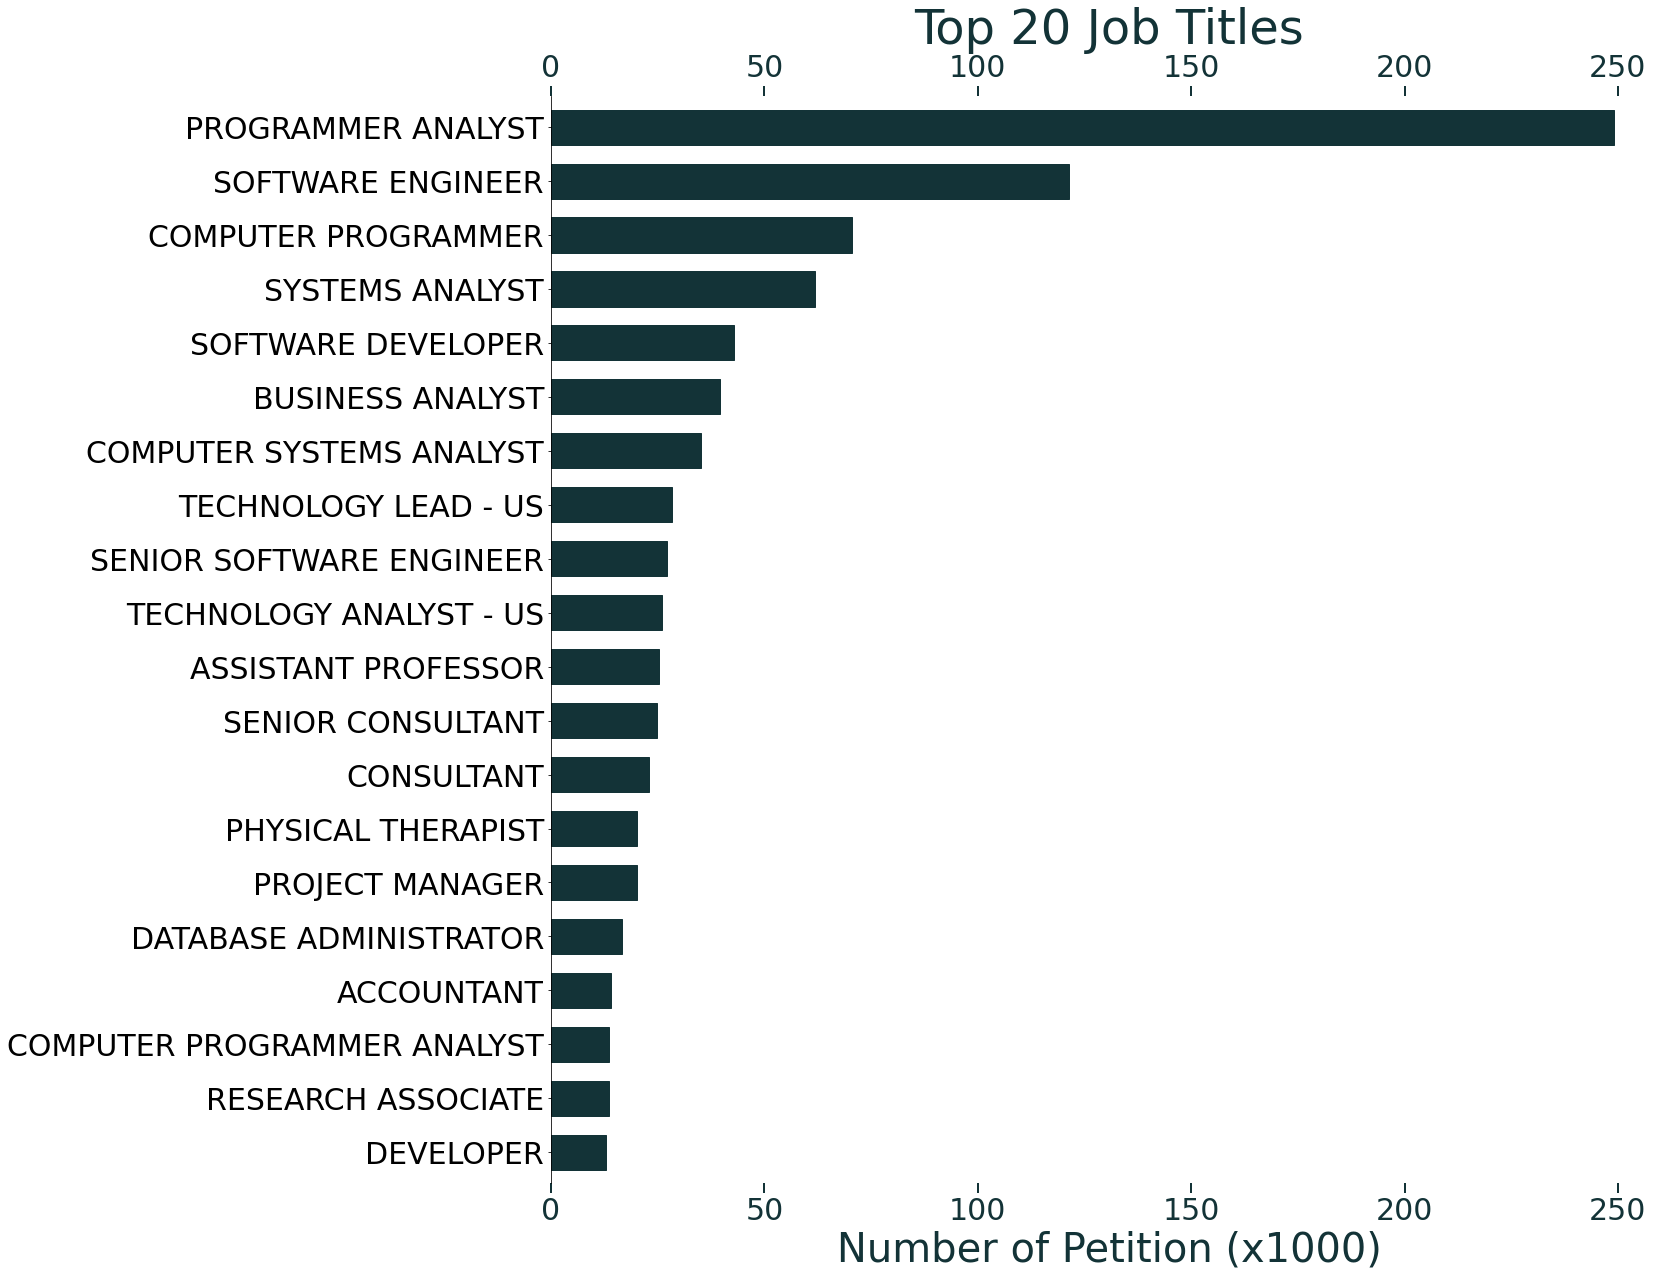

In [13]:
plot_hbar(df=top_job_title, 
          title_text = f"Top 20 Job Titles",
          xlabel_text = "Number of Petition (x1000)",
          top_n=20,
          color_primary =  "#133337",
          x_type="count")

### Yearly Petition Count

In [14]:
yearly_count = pd.DataFrame(df["YEAR"].value_counts())
yearly_count.columns = ["Petition Count"]

In [15]:
yearly_count.head()

,Petition Count
2016.0,647803
2015.0,618727
2014.0,519427
2013.0,442114
2012.0,415607


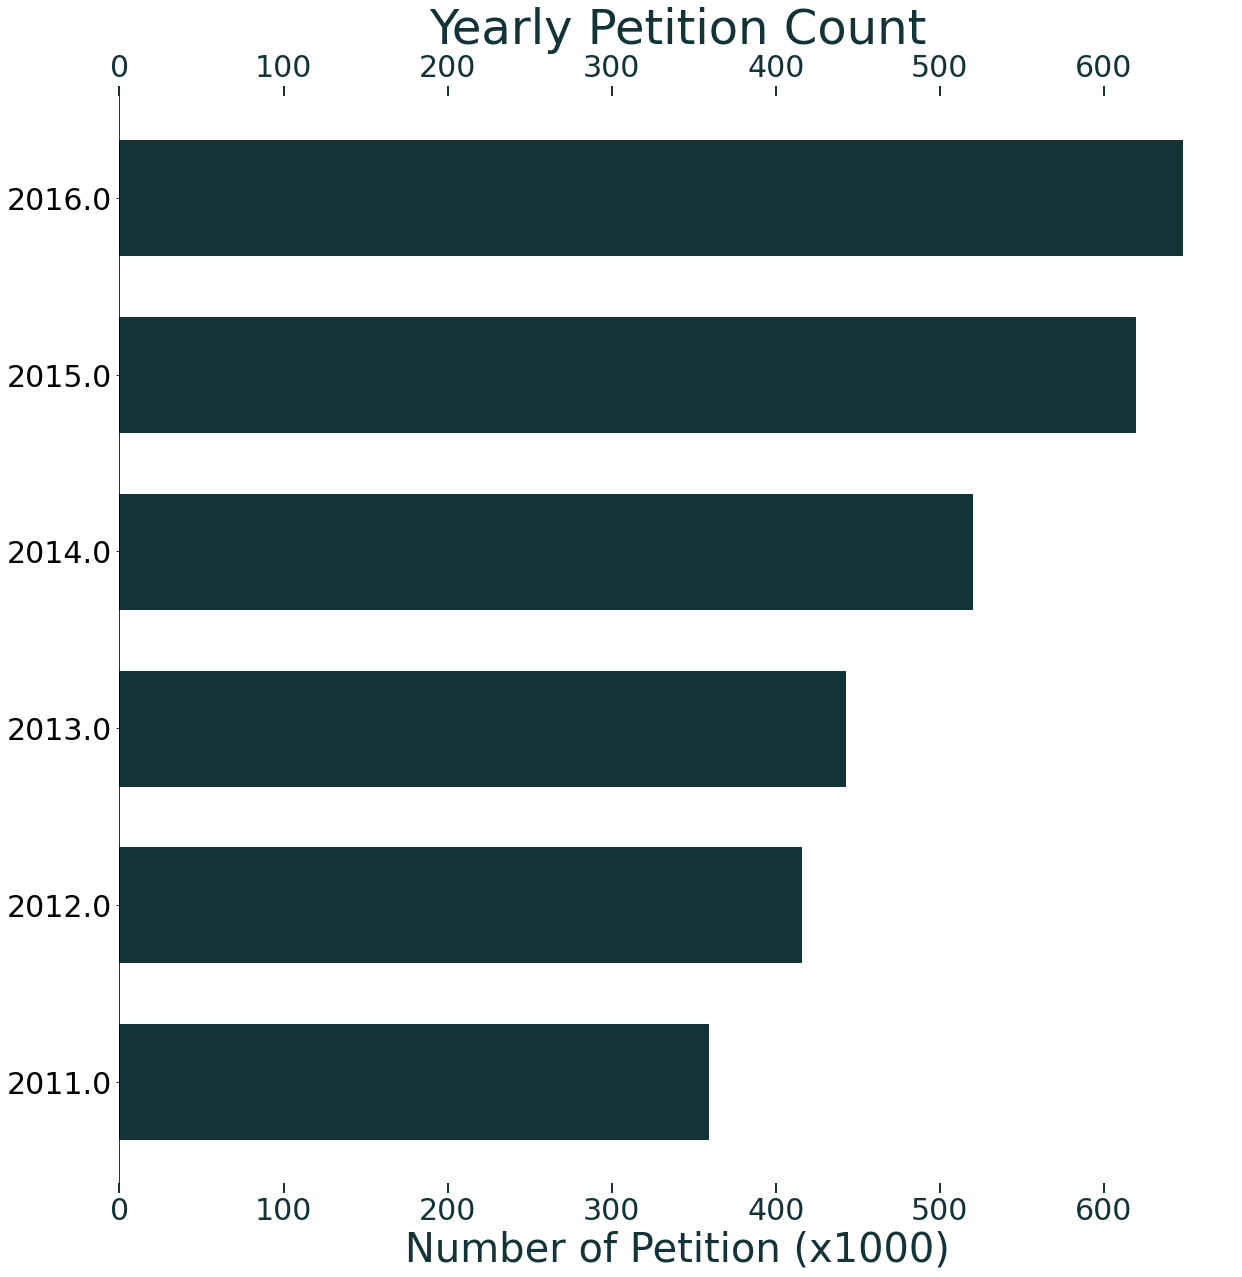

In [16]:
plot_hbar(df=yearly_count, 
          title_text = f"Yearly Petition Count",
          xlabel_text = "Number of Petition (x1000)",
          top_n=20,
          color_primary =  "#133337",
          x_type="count")

### Worksite 

In [17]:
worksite = pd.DataFrame(df["WORKSITE"].value_counts())
worksite.columns = ["petition_count"]

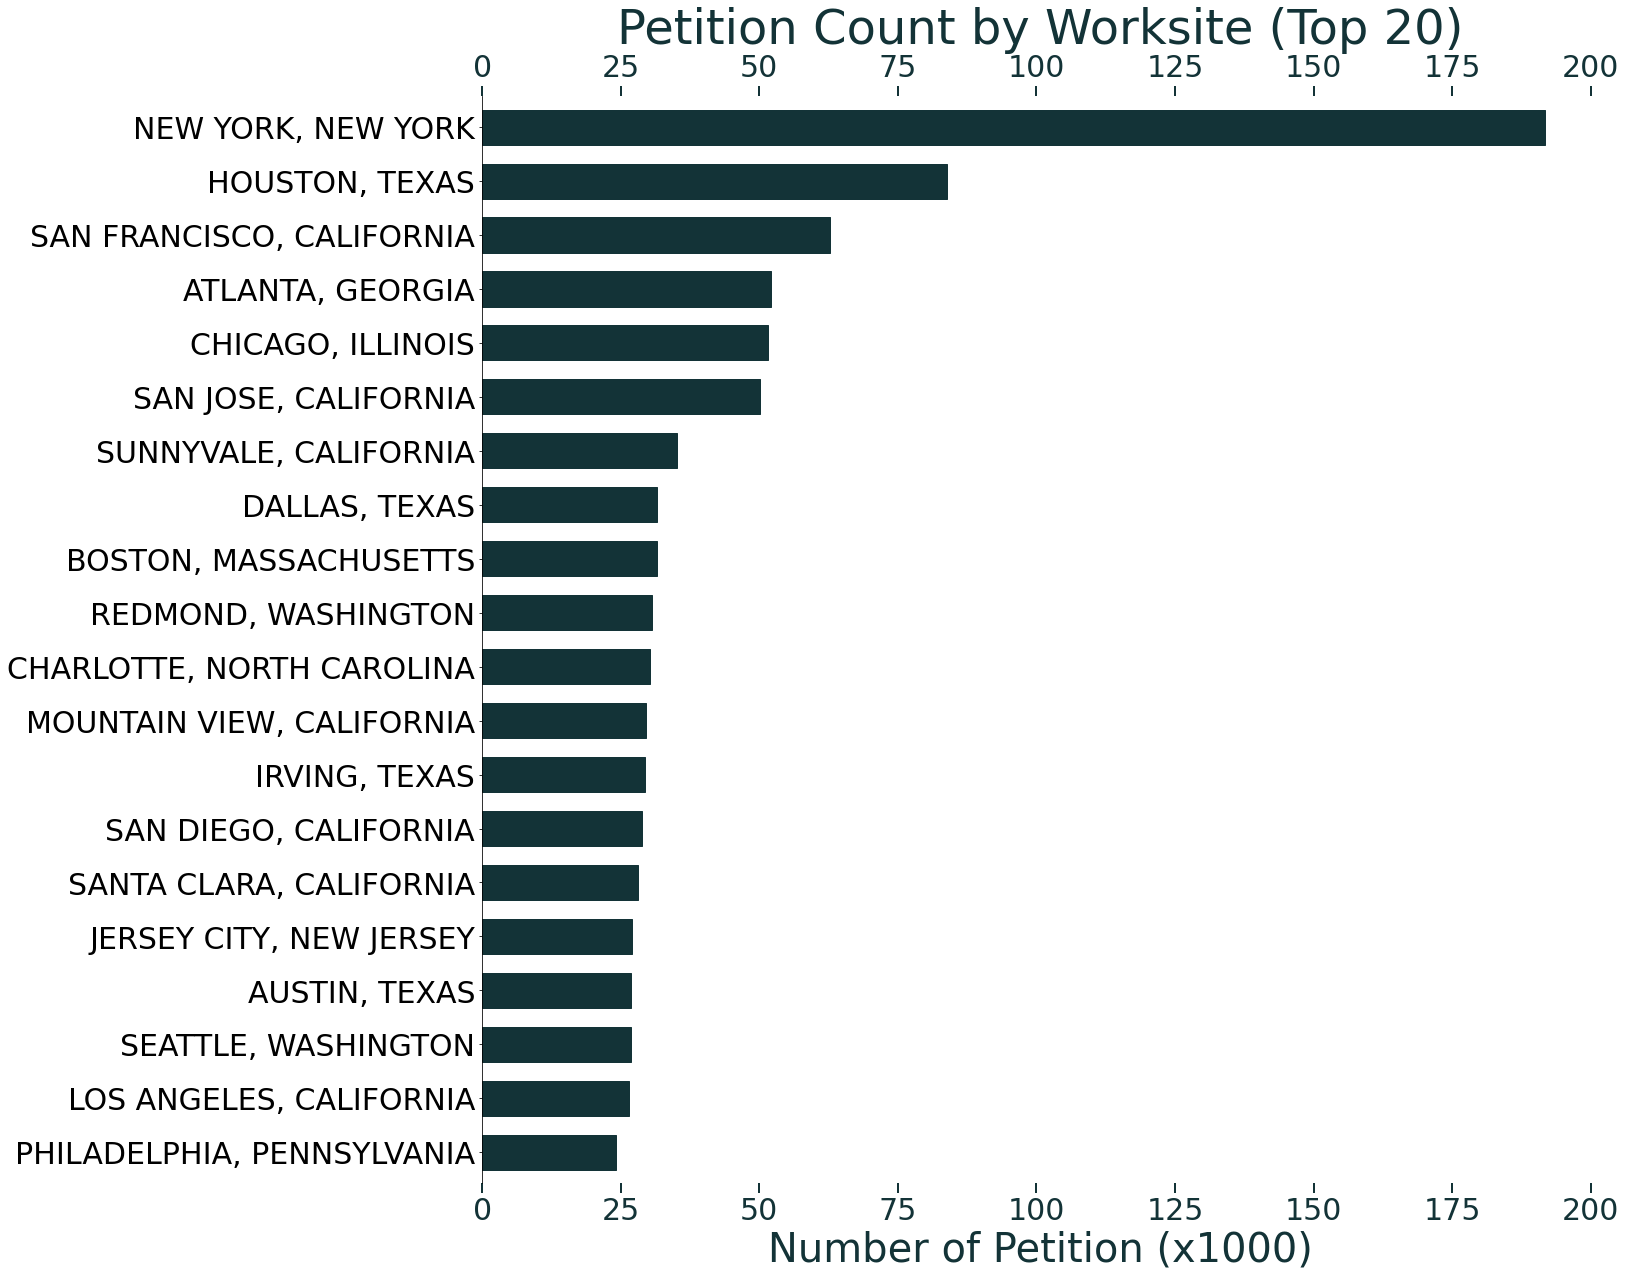

In [18]:
plot_hbar(df=worksite, 
          title_text = f"Petition Count by Worksite (Top 20)",
          xlabel_text = "Number of Petition (x1000)",
          top_n=20,
          color_primary =  "#133337",
          x_type="count")

### Mean Prevailing Wages by Worksite

In [19]:
prevailing_wages = df.groupby("WORKSITE").agg({"PREVAILING_WAGE":"mean"}).sort_values(by=["PREVAILING_WAGE"], ascending=False)


In [20]:
prevailing_wages.head()

,PREVAILING_WAGE
WORKSITE,
"WASHINGTON, NA",6.579000e+08
"SOMERSET, NEW YORK",1.263309e+08
"PEKIN, ILLINOIS",9.095134e+07
"CITY, CALIFORNIA",7.280000e+07
"MOUNTAIN VIEW, ILLINOIS",7.008897e+07


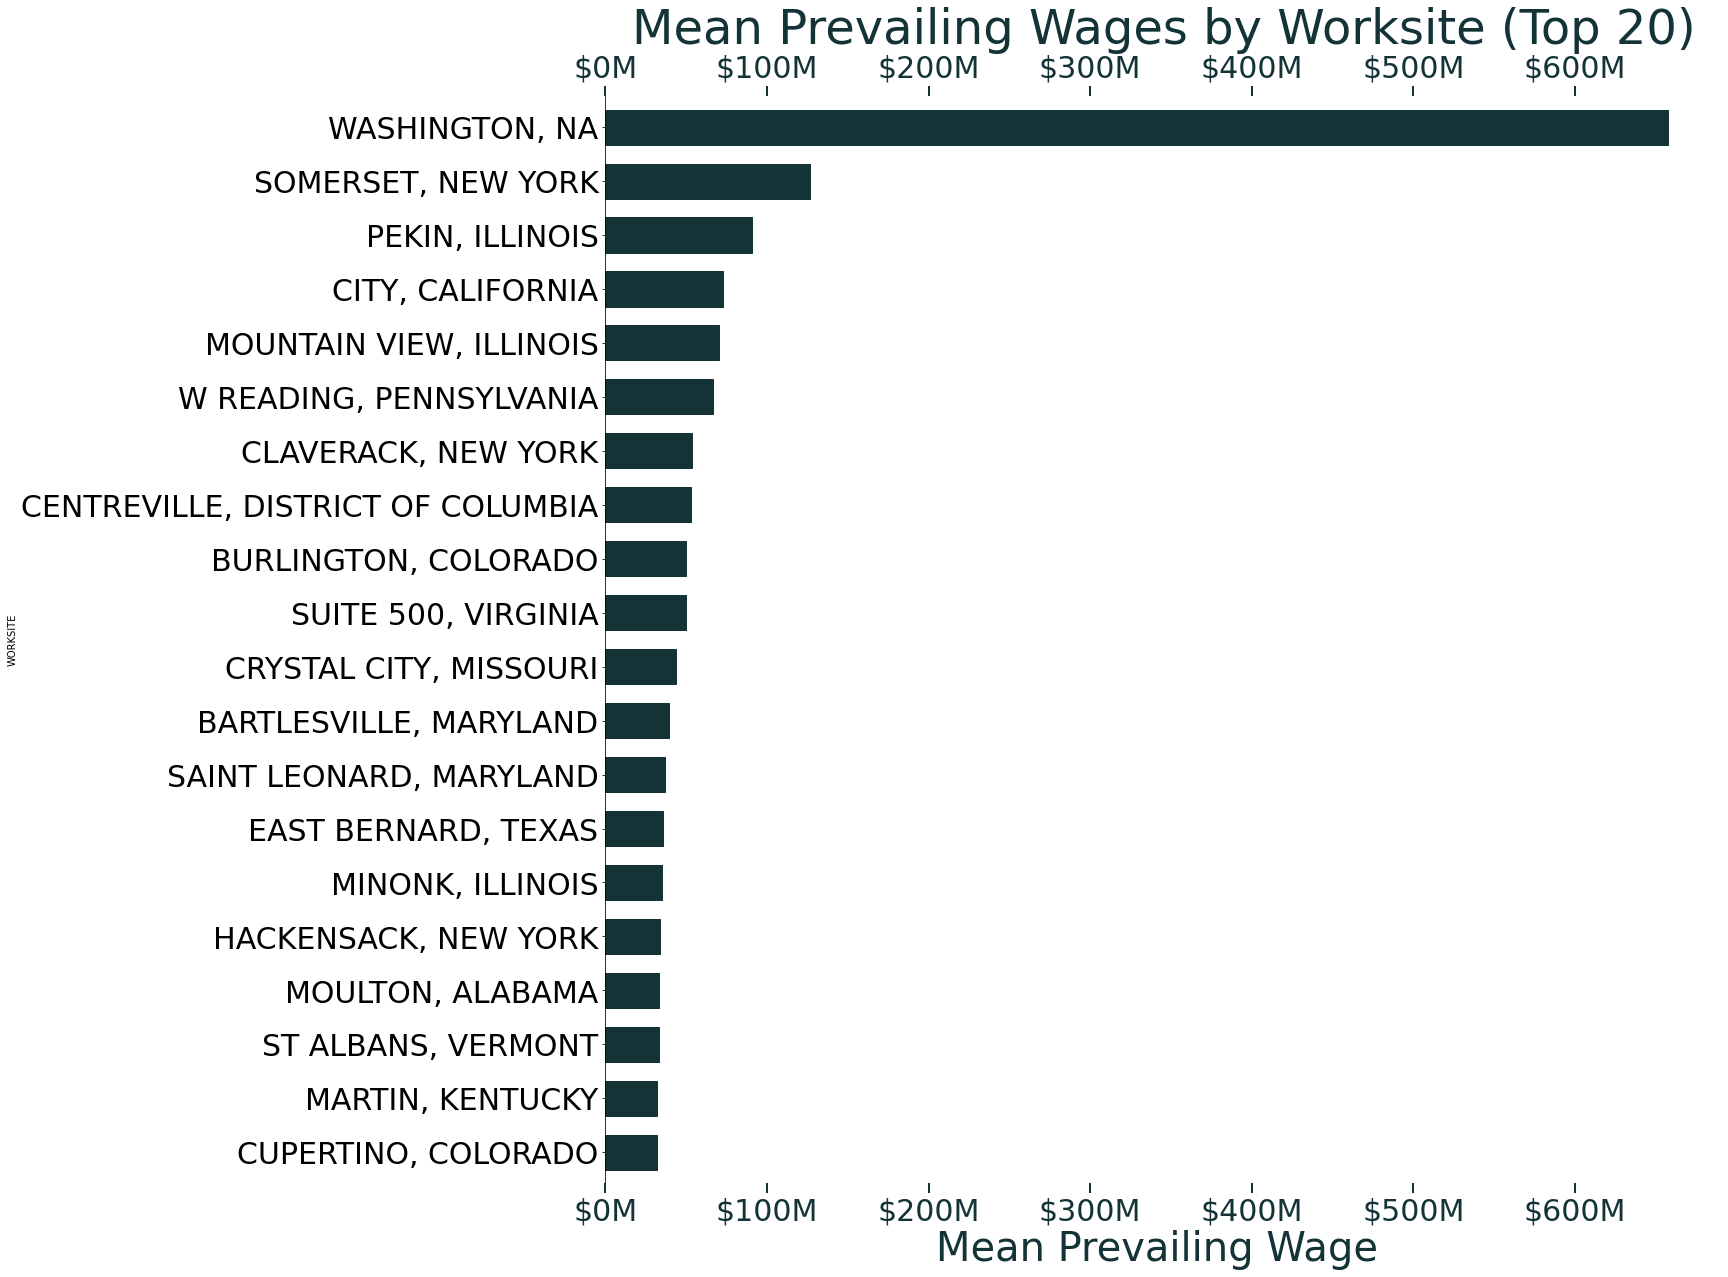

In [21]:
plot_hbar(df=prevailing_wages, 
          title_text = f"Mean Prevailing Wages by Worksite (Top 20)",
          xlabel_text = "Mean Prevailing Wage ",
          top_n=20,
          color_primary =  "#133337",
          x_type="currency")

### Median Prevailing Wages by Worksite

In [22]:
df[df["WORKSITE"] == "WASHINGTON, NA"]

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
2775906,2775907,DENIED,COMMONHEALTH ACTION,Medical and Health Services Managers,PROGRAM MANAGER (POSITIVE PATHWAYS),Y,657900000.0,2011.0,"WASHINGTON, NA",NaN,NaN


In [23]:
df[df["WORKSITE"] == "SOMERSET, NEW YORK"]

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1909257,1909258,DENIED,"RADUS TEK SERVICES INC.,",Computer Systems Analysts,PROGRAMMER ANALYST,Y,126330880.0,2013.0,"SOMERSET, NEW YORK",NaN,NaN


In [24]:
df[df["WORKSITE"] == "CITY, CALIFORNIA"]

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1701,1702,DENIED,GVHB,GENERAL AND OPERATIONS MANAGERS,PROPOSED JOB TITLE,Y,72800000.0,2016.0,"CITY, CALIFORNIA",NaN,NaN


In [25]:
df[df["WORKSITE"] == "CLAVERACK, NEW YORK"]

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
2021913,2021914,DENIED,"WONBUDDHISM OF U.S.A., INC.","Software Developers, Applications",SOFTWARE DEVELOPER,Y,107554720.0,2013.0,"CLAVERACK, NEW YORK",NaN,NaN
2040977,2040978,CERTIFIED,"WONBUDDHISM OF U.S.A., INC.","Software Developers, Applications",SOFTWARE DEVELOPER,Y,51709.0,2013.0,"CLAVERACK, NEW YORK",NaN,NaN


In [26]:
df.drop(df[df.index == 2775906].index, inplace = True)
df.drop(df[df.index == 1909257].index, inplace = True)
df.drop(df[df.index == 1701].index, inplace = True)
df.drop(df[df.index == 2021913].index, inplace = True)

In [27]:
prevailing_wages = df.groupby("WORKSITE").agg({"PREVAILING_WAGE":"median"}).sort_values(by=["PREVAILING_WAGE"], ascending=False)


In [28]:
prevailing_wages.head()

,PREVAILING_WAGE
WORKSITE,
"CENTREVILLE, DISTRICT OF COLUMBIA",53262154.5
"SAINT LEONARD, MARYLAND",36782715.5
"MINONK, ILLINOIS",34757902.5
"HACKENSACK, NEW YORK",33730122.5
"HARLINGEN CISD, TEXAS",3012624.0


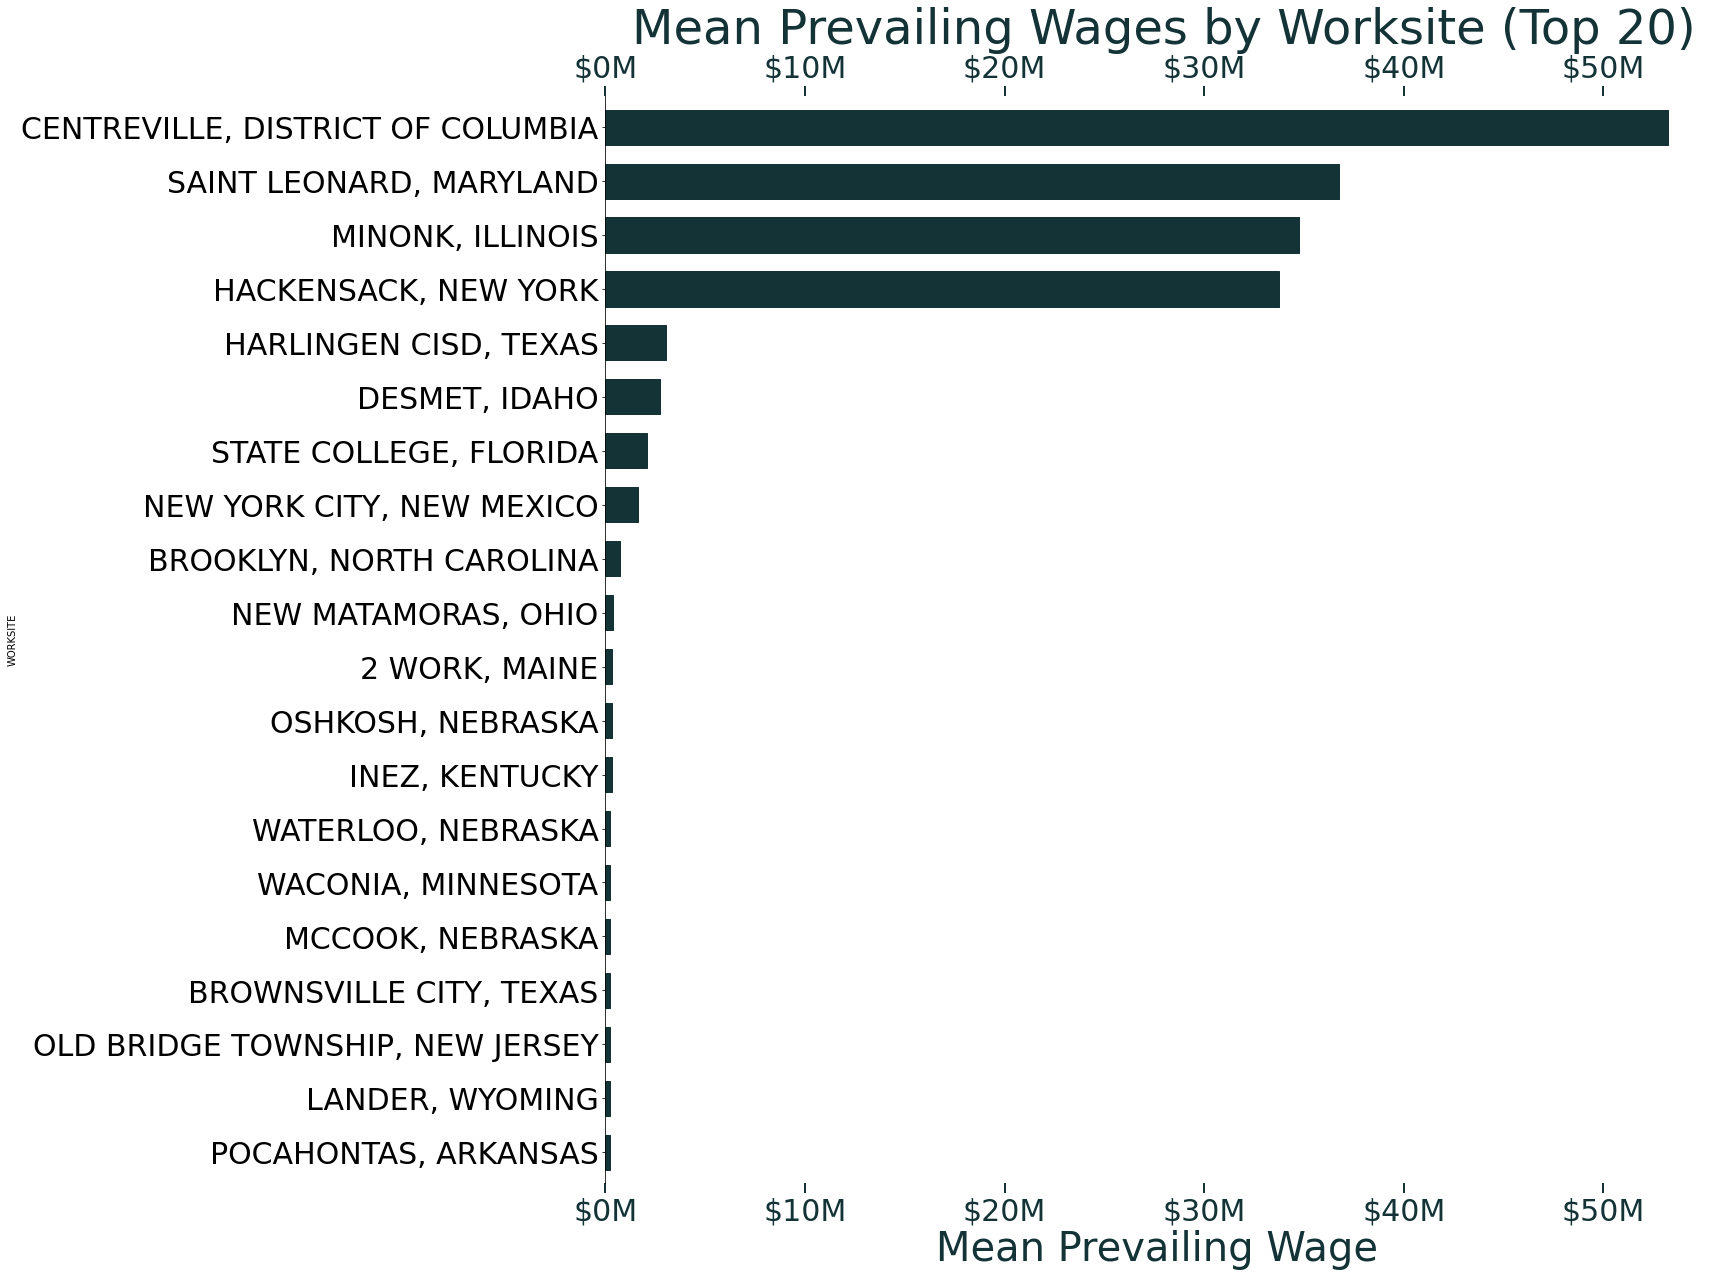

In [29]:
plot_hbar(df=prevailing_wages, 
          title_text = f"Mean Prevailing Wages by Worksite (Top 20)",
          xlabel_text = "Mean Prevailing Wage ",
          top_n=20,
          color_primary =  "#133337",
          x_type="currency")

In [30]:
df[df["WORKSITE"] == "CENTREVILLE, DISTRICT OF COLUMBIA"]

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
2171049,2171050,DENIED,INSTITUTE FOR GLOBAL ENGAGEMENT,Social and Community Service Managers,EAST ASIA PROGRAM OFFICER,Y,106473120.0,2013.0,"CENTREVILLE, DISTRICT OF COLUMBIA",NaN,NaN
2178057,2178058,CERTIFIED,INSTITUTE FOR GLOBAL ENGAGEMENT,Social and Community Service Managers,EAST ASIA PROGRAM OFFICER,Y,51189.0,2013.0,"CENTREVILLE, DISTRICT OF COLUMBIA",NaN,NaN


In [31]:
df[df["WORKSITE"] == "SAINT LEONARD, MARYLAND"]

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
2610935,2610936,DENIED,JEFFERSON PATTERSON HISTORICAL PARK AND MUSEUM,Museum Technicians and Conservators,CONTRACTUAL CONSERVATOR,Y,35351.0,2012.0,"SAINT LEONARD, MARYLAND",NaN,NaN
2613534,2613535,DENIED,JEFFERSON PATTERSON HISTORICAL PARK AND MUSEUM,Museum Technicians and Conservators,CONTRACTUAL CONSERVATOR,Y,73530080.0,2012.0,"SAINT LEONARD, MARYLAND",NaN,NaN


### Case Status Distribution

In [54]:
df_temp = df["CASE_STATUS"].value_counts(normalize=True)
df_temp.index

Index(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'WITHDRAWN', 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', 'REJECTED', 'INVALIDATED'], dtype='object')

In [55]:
df_temp.values

array([8.71165495e-01, 6.74980791e-02, 3.14217665e-02, 2.99086643e-02,
       4.99593497e-06, 6.66124663e-07, 3.33062332e-07])

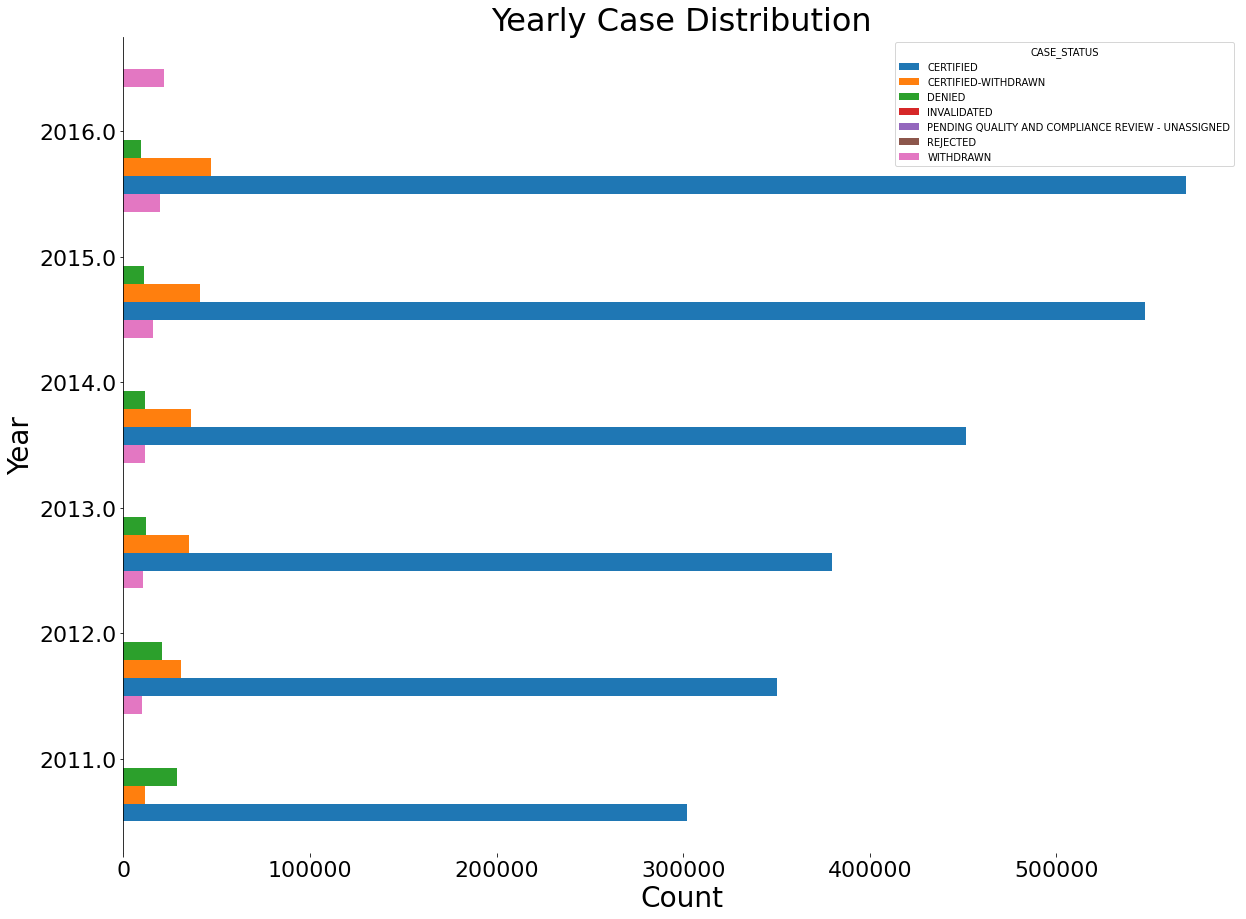

In [96]:
fig, ax = plt.subplots(figsize=(20,15))
df.groupby(["YEAR", "CASE_STATUS"]).count()["SOC_NAME"].unstack().plot(kind="barh", width=1, ax = ax);
ax.set_title('Yearly Case Distribution', rotation=0, fontsize=32);
ax.set_xlabel('Count', rotation=0, fontsize=28);
ax.set_ylabel('Year', rotation=90, fontsize=28);
ax.tick_params(axis="both", which="major", labelsize=22);
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# TODO:
* Geographical Distribution of H-1B Top Employers